In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [11]:
df = pd.read_csv(r'C:\Users\Research\Documents\GitHub\sunnyhills\data\archive\LightCurve_keys\TIC 140045538.csv')

time = pd.Series(df['time'])
flux = pd.Series(df['pdcsap_flux'])
fluxerr = pd.Series(df['pdcsap_flux_err'])

In [49]:
def remove_flares(time, flux): 

    removed_time, removed_flux = (np.array([]), np.array([]))
        
    # "global" view: 1024 point bin (1.4 days) 
    # "local" view: 128 point bin (4.3 hours) 

    continue_global = True 
    while continue_global:
        global_rolling = flux.rolling(1024, center=True) 
        global_medians = global_rolling.median()
        global_stds = global_rolling.std()
        cutoffs = global_medians+3*global_stds

        remove_indices = []
        for i in range(len(flux)): 
            if flux[i]>cutoffs[i] and global_medians[i]!=np.nan: 
                remove_indices.append(i)

        if len(remove_indices)==0: 
            continue_global = False 

        else:     
            
            removed_time = np.concatenate((removed_time, time[remove_indices])) 
            removed_flux = np.concatenate((removed_flux, flux[remove_indices])) 

            plt.scatter(removed_time, removed_flux)
            plt.show()

            print(len(flux), len(time))
            print(len(time), max(remove_indices))
            
            print(np.shape(remove_indices))

            for i in np.sort(remove_indices)[::-1]: 
                time = np.delete(time, i)
                
            #time = np.delete(time, remove_indices) 

            flux = np.delete(flux, remove_indices) 
            
    continue_local = True 
    while continue_local: 
        local_rolling = flux.rolling(128, center=True) 
        local_medians = local_rolling.median() 
        local_stds = local_rolling.std() 
        cutoffs = local_medians+3*local_stds 

        remove_indices = [] 
        for i in range(len(flux)): 
            if flux[i]>cutoffs[i] and local_medians[i]!=np.nan: 
                remove_indices.append(i) 

        if len(remove_indices)==0: 
            continue_global = False 

        else:     
            removed_time = np.concatenate((removed_time, time[remove_indices]))
            removed_flux = np.concatenate((removed_flux, flux[remove_indices]))

            time = np.delete(time, remove_indices)
            flux = np.delete(flux, remove_indices)

    return time, flux, removed_time, removed_flux 

clean_time, clean_flux, flair_time, flair_flux = remove_flares(time,flux)

In [48]:
clean_time, clean_flux, flair_time, flair_flux = remove_flares(time,flux)

plt.scatter(clean_time, clean_flux)
plt.scatter(flair_time, flair_flux)

18279 18279
18279 17195
(137,)


ValueError: Length of values (18278) does not match length of index (18279)

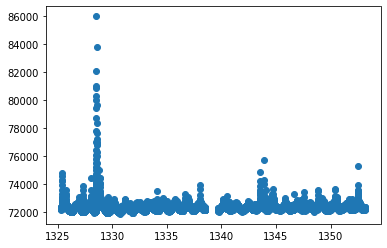

In [28]:
plt.scatter(time, flux)
plt.show()

In [23]:
cutoffs = np.array([2,2,2,2,2,2,2,2,2,2,2])
vals = np.array([1]*(len(cutoffs)-4)+4*[3])

print(len(np.where(vals>cutoffs)[0]))


4


In [26]:
import pandas as pd

print(np.concatenate(([1,2], pd.Series([3,4]))))

[1 2 3 4]
